<a href="https://colab.research.google.com/github/tangj310/MMA-869/blob/main/MMA_2022W_869_Individual_Assignment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA 869: Individual Assignment

<font color='red'>\# TODO: fill in the below</font>

- [Jerry, Tang]
- [20252935]
- [Section 1]
- [Fortress Besieged]
- [Aug 5, 2021]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python. You may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and scipy`.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [2]:
import datetime
import pandas as pd
import numpy as np

In [3]:
print(datetime.datetime.now())

2021-08-16 02:30:26.835045


In [4]:
!which python

/usr/local/bin/python


In [5]:
!python --version

Python 3.7.11


In [6]:
!echo $PYTHONPATH

/env/python


In [7]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every single posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a winner and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.


## 1.0: Load data 

In [8]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()
df1_org = df1.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline


In [10]:
# metrics function

## validation metircs
def internal_metrics(model,X_input):

  print()
  print()
  sil_score = silhouette_score(X_input, model.labels_)
  ch_score = calinski_harabasz_score(X_input, model.labels_)
  print("silhouette score is {}".format(round(sil_score,4)))
  print("calinski harabasz score is {}".format(round(ch_score,4)))

###PCA For Fun

<Figure size 864x864 with 0 Axes>

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

Text(0.5, 1.0, "PCA analysis to 'df1' data")

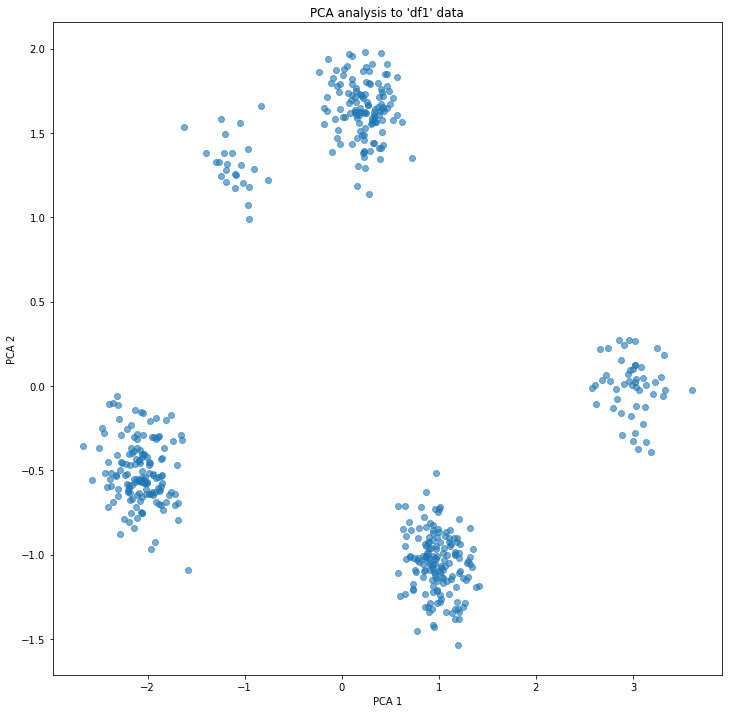

PC_1 explains 0.6381512449758922, PC_2 explains 0.3023634532867339
Total ratio explained by PC_1 and PC_2 is 0.940514698262626


In [11]:
# PCA for fun

# PCA-one hot encoding
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df1)


# PCA plot
plt.figure(figsize=(12,12))

plt.scatter(x = pca_data[:,0],
            y = pca_data[:,1],
            alpha= 0.6,            #alpha here is the tranparency
            cmap = "plasma")       #cmap here is the color        

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA analysis to 'df1' data")
plt.style.use('fivethirtyeight')

plt.show()

print("PC_1 explains {}, PC_2 explains {}".format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))
print("Total ratio explained by PC_1 and PC_2 is {}".format(pca.explained_variance_ratio_.sum()))

Text(0.5, 0, 'Number of PCA components')

Text(0, 0.5, 'Ratio explained by total PCA components')

Text(0.5, 1.0, 'PCA explained Ratio varying by number of components')

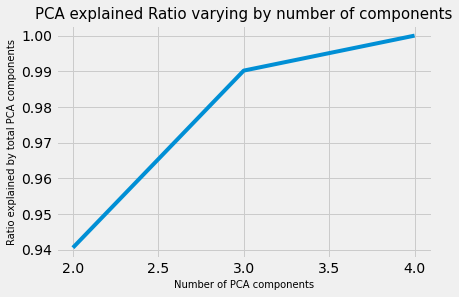

In [12]:
pca_list = []
pca_count = np.arange(2,5)

for n in range(2,5):

    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(scaled_df1) 
    pca_list.append(pca.explained_variance_ratio_.sum())

sns.lineplot(x=pca_count,y=pca_list,)

plt.xlabel("Number of PCA components",fontsize = 10)
plt.ylabel("Ratio explained by total PCA components",fontsize = 10)
plt.title("PCA explained Ratio varying by number of components", fontsize=15)

plt.show()

###K Means Baseline Model

silhouette score is 0.8049

calinski harabasz score is 3671.358

WCSS score is 66.5111

In [13]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(df1)


k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

WCSS_score = k_means.inertia_

internal_metrics(k_means,X)
print("WCSS score is {}".format(round(WCSS_score,4)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)



silhouette score is 0.8049
calinski harabasz score is 3671.358
WCSS score is 66.5111


###Hyper-Parameter Tuning K
###Elbow Method Evalute Metrics

Seems like K=5 is the best solution

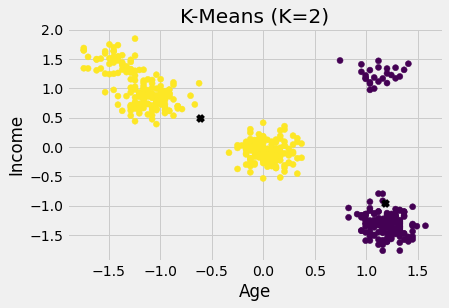

K=2, WCSS=1022.39, Sil=0.52


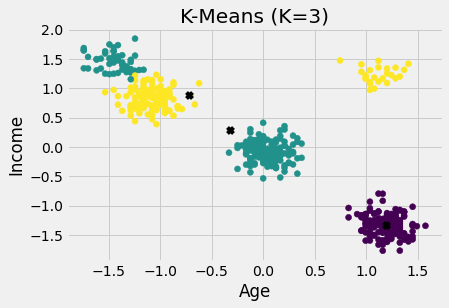

K=3, WCSS=384.81, Sil=0.70


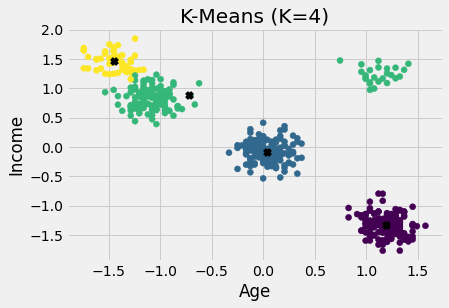

K=4, WCSS=189.70, Sil=0.76


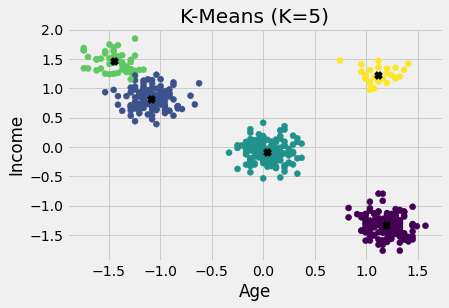

K=5, WCSS=66.51, Sil=0.80


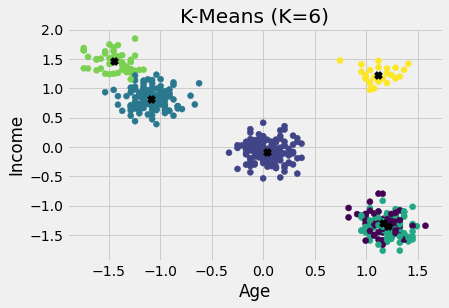

K=6, WCSS=61.14, Sil=0.63


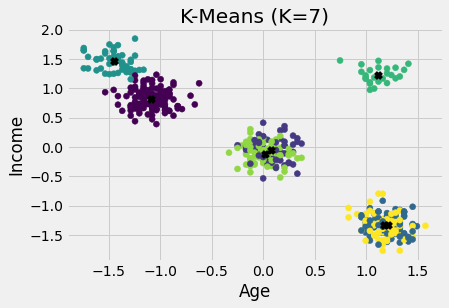

K=7, WCSS=56.89, Sil=0.45


In [15]:
#Selecting features "Age", "Income" to visualize the clusters

X=pd.DataFrame(data=X, columns=df1.columns)

def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Age');
    plt.ylabel('Income');
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 8):
    do_kmeans(X, k)

###Clustering Evaluation

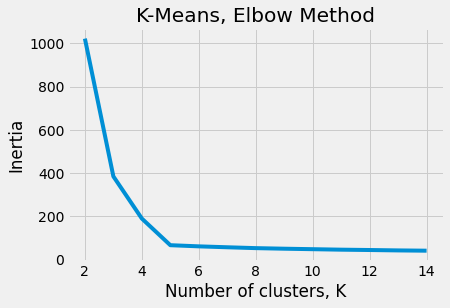

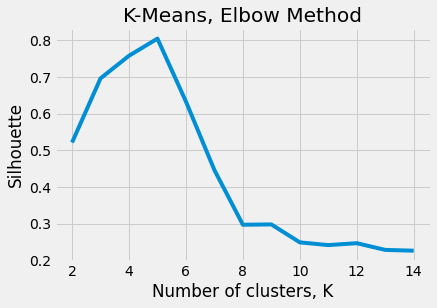

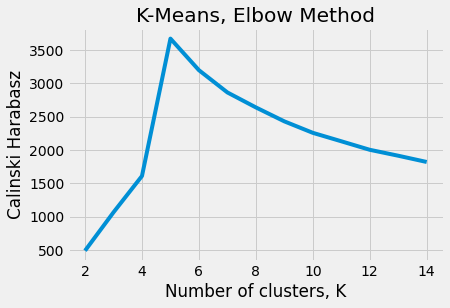

In [16]:
# elbow method for best K

inertias = {}
silhouettes = {}
ch = {}

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    ch[k] = calinski_harabasz_score(X, kmeans.labels_)

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

plt.figure();
plt.plot(list(ch.keys()), list(ch.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Calinski Harabasz");

# seems like 5 is the best K

## 1.2: Clustering Algorithm #2

###Hierarchical Baseline Model
silhouette score is 0.8049

calinski harabasz score is 3671.358

In [17]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

internal_metrics(agg, X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)



silhouette score is 0.8049
calinski harabasz score is 3671.358


###Dendograms

In [18]:
import scipy as sp
import scipy.cluster

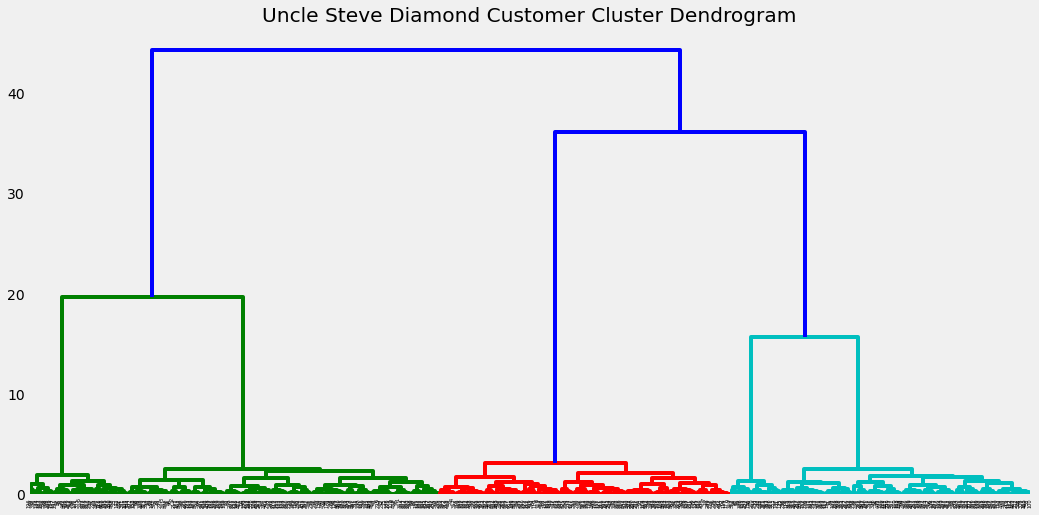

In [19]:
aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Uncle Steve Diamond Customer Cluster Dendrogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

###Hyper-parameter tunning Hierarchical Clustering

In [20]:
affinity_list = ["euclidean", "l1", "l2", "manhattan", "cosine", "precomputed"]
linkage_list = ["ward", "complete", "average", "single"]

for j in linkage_list:

  agg = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage=j)
  agg.fit(X)

  internal_metrics(agg, X)

# The linkage parameters do not change the score
# when K=5

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)



silhouette score is 0.8049
calinski harabasz score is 3671.358


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5)



silhouette score is 0.8049
calinski harabasz score is 3671.358


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5)



silhouette score is 0.8049
calinski harabasz score is 3671.358


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=5)



silhouette score is 0.8049
calinski harabasz score is 3671.358


In [21]:
# Hyper Tuning K in Hierarchical Clustering
# And interestingly to see that K=6 is the best fit

for n in range(2,8):

  agg = AgglomerativeClustering(n_clusters=n, affinity="euclidean", linkage="ward")
  agg.fit(X)

  internal_metrics(agg, X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)



silhouette score is 0.5148
calinski harabasz score is 475.8358


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)



silhouette score is 0.6963
calinski harabasz score is 1066.5812


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)



silhouette score is 0.7581
calinski harabasz score is 1611.2647


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)



silhouette score is 0.8049
calinski harabasz score is 3671.358


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)



silhouette score is 0.6277
calinski harabasz score is 3175.3967


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)



silhouette score is 0.4259
calinski harabasz score is 2795.2725


## 1.3 Model Comparison


**Quality of Results**: Both k_means and hierarchical show excellent clustering quality in this case. k_means chooses 5 clusters to be the best fit, while hierarchical clustering chooses 6 clusters, and the euclidean distance around 10 seems to be a resonable choice.

**Ease of Use**: In this case, k_means is easier to use, due to the comparable small dataset, all numeric values and easy package access. Hierarchical clustering requires the scipy to draw the dendograms for a better understanding

**Speed**: In this small dataset, both clustering algorithms are efficiency and speedy, however, k_means would be faster on especially larger databecause only "euclidean" distance can be applied

**Interpretability**: The result of k_means is unstructured, but that of hierarchal is more interpretable and informative. However, in particular this small dataset, which contains only numeric features, k_means is more easy to interpret the customer groups with actual statistical numbers

In conclusion, we will choose **k_means to be the best fit** in this case.

## 1.4 Personas

###For Each Cluster, Show Feature Means

In [22]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

labels = k_means.labels_
df1["Cluster ID"] = labels

means = np.zeros((5, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:]))
    
means


Cluster 0 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 1 (n=126):
[    32.78 105265.81      0.31  14962.78]

Cluster 2 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 3 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]


array([[ 1.19, -1.33, -0.68,  0.97],
       [-1.09,  0.83, -0.75,  0.63],
       [ 0.04, -0.09,  1.03, -1.01],
       [-1.44,  1.46,  1.51, -1.57],
       [ 1.12,  1.24, -1.68,  0.6 ]])

###For Each Cluster, Show (Even More) Feature Stats

In [23]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=df1_org.columns)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(X[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 505


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,59.02,97.00,83.18,57.56,24.79
Income,12000.00,75513.29,142000.00,111541.90,70425.76,30539.63
SpendingScore,0.00,0.51,1.00,0.76,0.57,0.14
Savings,0.00,11862.46,20000.00,16816.59,10068.59,4685.19



Cluster 0:
Number of Instances: 147


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,79.00,87.78,97.00,59.53,58.71,47.69
Income,12000.00,27866.10,46977.00,76669.86,80132.22,81449.08
SpendingScore,0.20,0.33,0.47,0.51,0.59,0.63
Savings,13470.97,16659.26,20000.00,12145.91,11114.44,11991.20



Cluster 1:
Number of Instances: 126


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,22.00,32.78,44.00,59.62,62.86,66.99
Income,89598.00,105265.81,119877.00,76541.57,76634.13,64585.25
SpendingScore,0.17,0.31,0.41,0.51,0.45,0.51
Savings,12207.53,14962.78,17968.55,12090.45,12134.49,10963.23



Cluster 2:
Number of Instances: 157


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,51.00,59.96,68.00,59.49,63.48,52.66
Income,56321.00,72448.06,90422.00,76596.27,80762.80,76774.09
SpendingScore,0.66,0.77,0.91,0.51,0.61,0.58
Savings,4077.66,6889.97,10547.78,12086.41,13179.50,14336.46



Cluster 3:
Number of Instances: 50


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,24.18,31.00,59.58,49.02,45.82
Income,117108.00,128029.12,142000.00,76413.35,86686.66,52197.55
SpendingScore,0.81,0.90,1.00,0.51,0.55,0.44
Savings,0.00,4087.52,6089.48,12192.66,6842.94,18038.91



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,77.00,86.00,93.00,59.58,56.77,58.46
Income,110582.00,119944.04,128596.00,76192.26,76326.08,48538.51
SpendingScore,0.00,0.07,0.16,0.51,0.62,0.36
Savings,12554.69,14808.68,17833.09,12134.30,14948.38,14021.13


**Cluster Description**

**cluster 0** "The retirements". This group has a mean age of 87.78 with mean income of 27866.10, which probably comes from retirement savings and pension plan. They are not the major work force in the labor market, and their savings 16659.26 will ensure them to spend rest of their lifes. Their low spending score 0.33 also indicates their lifestyle "SAVE AND REST"

**cluster 1** "The middle class". This group has a mean age of 32.78 with mean income of 105265.81, They are the major work force in the labor market with a high salary brackets. This group of customers may work as a senior position or manager in their companies. They have comparable high savings 14962.78 and low spending score 0.31. Save money for their kids' education? Save the budget for the new house? Too much need to be planned and saved in their 30s, but life has to keep going on.

**cluster 2** "The struggle seniors". This group has a mean age of 59.96 with mean income of 72448.06. They are not the major work power in the labor market. Their income may just be enough for the retirement. Their saving level is around 6889.97 and spending score is 0.77 which is relatively high with the amount of income and savings. They are struggle with their saving plans and need more money for the retirements. This group of customers may need extra help from this country and benefits system.

**cluster 3** "The Elites". This group has a mean age of 24.18 with mean income of 128029.12. They just come out of school, but with a high salary bucket. This group of customers may contain a high education level, such as MSc or Phd. High-pay working industry such as IT, investment banking, or consulting. They have very low savings 4087.52 and high spending score 0.90. They enjoy their best life. "Work hard, Play hard" is their principle. Social networkings, bars, high-end restaurants. Life is beautiful and enjoyable, is it?

**cluster 4** "The first class grandpa". This group has a mean age of 86 with mean income of 119944.04. President of the company? Board member of the corporate? They are the retirement group but their legacy will be remebered. They have high savings 14808.68 and extremely low spending score 0.07. They enjoy their life and do not have places to spend their fortune. Save their legacy for the next generation or donate to the society. They are the first class elders.

###Examplars

In [24]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    print("  Examplar ID: {}".format(exemplar_idx))
    print("  Label: {}".format(labels[exemplar_idx]))
    print("  Features:")
    display(df1_org.iloc[[exemplar_idx]])


Cluster 0:
  Examplar ID: 335
  Label: 0
  Features:


,Age,Income,SpendingScore,Savings
335,89,26940,0.33,16555.16



Cluster 1:
  Examplar ID: 405
  Label: 1
  Features:


,Age,Income,SpendingScore,Savings
405,34,103204,0.30,15149.81



Cluster 2:
  Examplar ID: 467
  Label: 2
  Features:


,Age,Income,SpendingScore,Savings
467,61,72027,0.76,6926.12



Cluster 3:
  Examplar ID: 95
  Label: 3
  Features:


,Age,Income,SpendingScore,Savings
95,25,130934,0.91,3942.39



Cluster 4:
  Examplar ID: 155
  Label: 4
  Features:


,Age,Income,SpendingScore,Savings
155,86,115689,0.06,14803.15


###Snakeplot

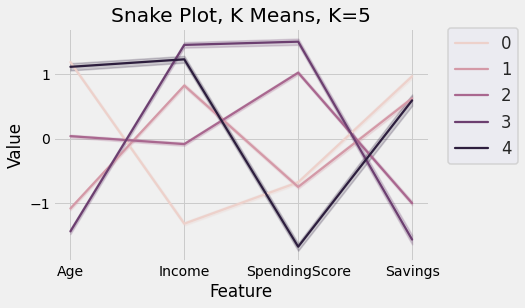

In [28]:
X_df = pd.DataFrame(X, columns=df1_org.columns)
X_df['Cluster'] = labels
X_df.head()

X_df_melt = pd.melt(X_df,
    id_vars=['Cluster'],
    value_vars=df1_org.columns,
    var_name='Feature',
    value_name='Value')

plt.title('Snake Plot, K Means, K=5');
sns.set(style="darkgrid")
sns.set_context("talk")
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df_melt, legend="full");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

**Answer**: The rule `{pepsi} -> {chips}` would have both high support, and high confidence. Due to Covid-19 people, cannot go outside but spend their time watching TV shows. A high percentage of transactions would include both `{pepsi}` and `{chips}`, since those two are the best friends when you enjoy the show with your family. This rule would also have high confidence. Because when people buy pepsi, they are more likely to buy chips after. The two items are the best party combination as well. This rule may not be the most interesting one to Uncle Steve, since it is the common sense to buy both chips and pepsi for party(no cola, always pepsi)

## 2.2: A rule that might have reasonably high support but low confidence.

**Answer**: The rule `{Makeup remover} -> {Beard shaving cream}` would have high support, but probably low confidence. Both partners may shop the daily facial clenars together and put them in the same busket. So a high percentage of transactions would include both `{Makeup remover}` and `{Beard shaving cream}`. But not necessary when ladies buy the `{Makeup remover}` will lead them to buy `{Beard shaving cream}` with a high confidence. Since ladies just don't need the `{Beard shaving cream}`. This rule may be interesting to Uncle Steve, since the high support may put two items on the transactions together but they are not bought with high confidence. Uncle Steve may reorganize the shelf to put the items together for more revenue.

## 2.3: A rule that might have low support and low confidence.

**Answer**: The rule `{Ice cream} -> {Toothpaste}` would have both low support, and low confidence. Cannot think of the close correlatino of those two items. `{Ice cream}` for joy, happiness and mostly, kids will buy it. `{Toothpaste}` settles in personal care category, which people only buy it when they run out. And I don't think kids will buy toothpaste unless their parents tell them so. In conclusion, it is fair to see a low support low confidence relationship between `{Ice cream}` and `{Toothpaste}`. Uncle Steve may not show much interets on this rule, simply, this rule will not bring significant revenue increase and it is not fun.

## 2.4: A rule that might have low support and high confidence.

**Answer**: The rule `{Organic skim milk} -> {Organic broccli}` would have low support, but relatively high confidence. This rule has low support, which means that they are not shown together frequently in the busket since people usually buy skim milk for breakfast but broccli for a regular meal. But both contains high nutritions and various vitamins. So when people buy the `{Organic skim milk}` they will also a relatively high confidence in buying the `{Organic skim broccli}`. This rule may be interesting to Uncle Steve, since Uncle Steve can reposition the two products to close shelf to further increase the revenue. And keeping a healthy lifestyle is important to everyone.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [29]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df3.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,0,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,1,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,1,3823,0,18,North Judithbury,Vacation,1983-08-08


## 3.1: Baseline model


###Basic EDA

In [30]:
# df3.isnull().sum()
# no missing values

# sns.heatmap(df3.corr())
# medium correlation between target varaible "BadCredit" and feature "Amount"

# y_train.value_counts()
# binary classification with imbalanced target variable
X_full = X_train.assign(BadCredit = y_train.values)
numeric = X_train.select_dtypes(include=np.number).columns
categorical = X_train.select_dtypes(exclude=np.number).columns

In [31]:
X_full["FullName"] = X_full["FirstName"] + X_full["LastName"]

X_full["FullName"].duplicated().value_counts() # Superisingly to see there are duplicates in Names
print()
X_full["UserID"].duplicated().value_counts() # But no duplicates in ID #

False    4659
True      141
Name: FullName, dtype: int64

False    4800
Name: UserID, dtype: int64

In [32]:
# is it possible that the same individual has multiple phones
X_full[X_full["FullName"].duplicated() == True]

# Confirmed that in this dataset there are no diplicated individuals but there can be different people share the same name

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth,BadCredit,FullName
1200,079-40-5021,M,0,Robert,Richards,1,1,3,1199 Bass Common Apt. 815,466-GXOZ,2821,1,30,North Judithbury,Vacation,1960-06-04,0,RobertRichards
3400,756-32-8893,F,0,Kelly,Allen,2,2,3,48615 Flores Pass Suite 934,4869,3280,0,24,North Judithbury,UsedCar,1973-12-07,0,KellyAllen
864,123-68-7503,M,0,Robert,Richards,1,0,3,6844 Stacey Oval Apt. 379,12-12110,3572,1,18,New Kellystad,UsedCar,1967-07-07,0,RobertRichards
2025,411-67-5425,F,0,Courtney,Smith,1,1,3,744 Coleman Stravenue,LYE 469,4304,0,30,Robinsonshire,Household,1981-06-03,1,CourtneySmith
4783,672-49-6907,F,0,Patricia,Morris,2,1,2,9222 Adrian Row Suite 416,WNI-574,2971,0,24,North Judithbury,UsedCar,1972-06-06,0,PatriciaMorris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,364-13-8265,M,0,Todd,Hernandez,2,3,2,538 Nicholas Corner Apt. 723,2-6429Q,3874,0,6,North Judithbury,Household,1977-02-25,0,ToddHernandez
5393,238-46-3519,F,0,Sarah,Miller,0,4,5,2807 Sanchez Inlet Suite 130,260 8KN,3905,0,24,Robinsonshire,Household,1966-11-22,0,SarahMiller
130,152-12-4067,F,0,Jennifer,Herrera,1,0,2,4741 Eric Spur,035 WWT,3569,1,30,North Judithbury,NewCar,1973-03-07,0,JenniferHerrera
3171,580-56-0494,M,0,Richard,Taylor,2,3,2,7699 Edwards Cove Suite 893,363G9,3621,0,36,Herrerafurt,UsedCar,1974-07-26,0,RichardTaylor


In [33]:
# Distribution of the numeric features
for col in numeric:

  px.histogram(data_frame=X_full,x=col,color="BadCredit",
            marginal="box")

### PCA

In [34]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 4.1 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



<Figure size 864x864 with 0 Axes>

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

Text(0.5, 1.0, "PCA analysis to 'df1' data")

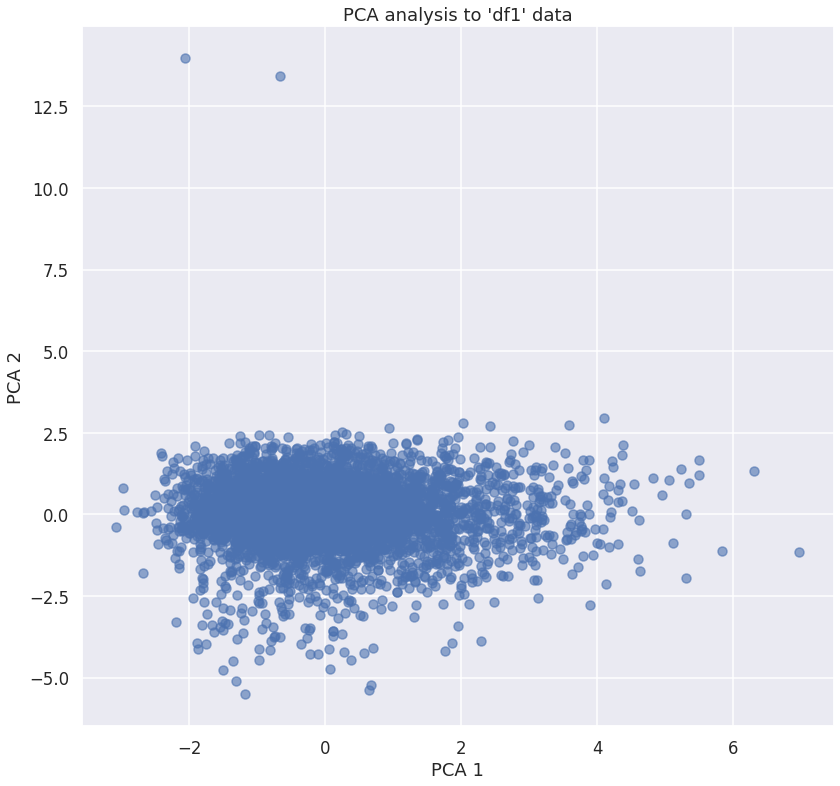

PC_1 explains 0.10864071933676583, PC_2 explains 0.07751663039648865
Total ratio explained by PC_1 and PC_2 is 0.18615734973325448


In [35]:
# PCA for fun
# Conclusion: PCA not much helpful

#target encoding categorical features
import category_encoders as ce

encoder = ce.TargetEncoder() # need to tune the target encoder hyper-p
# train the target encoder based on training set
X_train_encoded = encoder.fit_transform(X=X_train,y=y_train)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train_encoded)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_X_train)


# PCA plot
plt.figure(figsize=(12,12))

plt.scatter(x = pca_data[:,0],
            y = pca_data[:,1],
            alpha= 0.6,            #alpha here is the tranparency
            cmap = "plasma")       #cmap here is the color        

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA analysis to 'df1' data")
plt.style.use('fivethirtyeight')

plt.show()

print("PC_1 explains {}, PC_2 explains {}".format(pca.explained_variance_ratio_[0],pca.explained_variance_ratio_[1]))
print("Total ratio explained by PC_1 and PC_2 is {}".format(pca.explained_variance_ratio_.sum()))

###Base Model: LightGBM/RF/XGBOOST/Logistics

In [36]:
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [37]:
drop_features = ['UserID', 'DateOfBirth', 'FirstName', "LastName", 'Street', 'LicensePlate']
categorical_features = ["Sex", "City","Purpose"]
numeric_features =["PreviousDefault","NumberPets","PreviousAccounts","ResidenceDuration","Amount","Married","Duration"]

tg_encoder = ce.TargetEncoder()
std_scaler = StandardScaler()
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
rf_classsifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_classifier = LogisticRegression(random_state=42)

preprocessor_1 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[
            ('cat', tg_encoder, categorical_features),
            ('num', std_scaler, numeric_features),
            ('drop', 'drop', drop_features)],
            remainder = 'passthrough', 
            sparse_threshold=0)),
    ])


pipeline_lgbm = make_pipeline(
    preprocessor_1,
    lgbm_classifier)

pipeline_rf = make_pipeline(
    preprocessor_1,
    rf_classsifier)

pipeline_xgb = make_pipeline(
    preprocessor_1,
    xgb_classifier)

pipeline_lgr = make_pipeline(
    preprocessor_1,
    logistic_classifier)


pipelines = [pipeline_lgbm, pipeline_rf, pipeline_xgb, pipeline_lgr]

pipe_dict = {
    0:"LightGMB Classifier",
    1:"RandomForest Classifier",
    2:"XGBoost Classifier",
    3:"Logistic Classifier"
}

for i,pipeline in enumerate(pipelines):

  scores = cross_val_score(pipeline, X_train, y_train, 
                         scoring='f1_micro', cv=10, n_jobs=-1)

  print("{} CV f1-micro scores are {}".format(pipe_dict[i],scores))
  print("{} mean score is {}".format(pipe_dict[i],np.mean(scores)))
  print()

LightGMB Classifier CV f1-micro scores are [0.81 0.81 0.81 0.82 0.83 0.84 0.84 0.83 0.83 0.82]
LightGMB Classifier mean score is 0.8241666666666667

RandomForest Classifier CV f1-micro scores are [0.82 0.82 0.82 0.82 0.83 0.84 0.83 0.83 0.81 0.82]
RandomForest Classifier mean score is 0.8252083333333333

XGBoost Classifier CV f1-micro scores are [0.83 0.82 0.83 0.84 0.83 0.85 0.83 0.85 0.83 0.84]
XGBoost Classifier mean score is 0.8341666666666667

Logistic Classifier CV f1-micro scores are [0.83 0.82 0.84 0.83 0.83 0.85 0.86 0.85 0.83 0.82]
Logistic Classifier mean score is 0.8366666666666667



## 3.2: Feature engineering

In [38]:
# yeojohnson transformation on "Amount","PreviousAccounts","ResidenceDuration"
# Aage in years from 2021
# PCA

from sklearn.preprocessing import PowerTransformer, FunctionTransformer

drop_features = ['UserID', 'DateOfBirth', 'FirstName', "LastName", 'Street', 'LicensePlate']
categorical_features = ["Sex", "City","Purpose"]
numeric_features =["PreviousDefault","NumberPets","PreviousAccounts","ResidenceDuration","Amount","Married","Duration"]

tg_encoder = ce.TargetEncoder()
std_scaler = StandardScaler()
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
rf_classsifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_classifier = LogisticRegression(random_state=42)
pt = PowerTransformer(method='yeo-johnson', standardize=True)

def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)


preprocessor_2 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[         
            ('cat', tg_encoder, categorical_features),
            ("age",FunctionTransformer(get_age_years, validate=False), "DateOfBirth"),
            ("yeo-johnson", pt, ["Amount","PreviousAccounts","ResidenceDuration"]),
            ('num', std_scaler, numeric_features),
            ('drop', 'drop', drop_features),],
            remainder = 'passthrough', 
            sparse_threshold=0)),
            ('pca', PCA(n_components=10))
    ])


pipeline_lgbm = make_pipeline(
    preprocessor_2,
    lgbm_classifier)

pipeline_rf = make_pipeline(
    preprocessor_2,
    rf_classsifier)

pipeline_xgb = make_pipeline(
    preprocessor_2,
    xgb_classifier)

pipeline_lgr = make_pipeline(
    preprocessor_2,
    logistic_classifier)

pipelines = [pipeline_lgbm, pipeline_rf, pipeline_xgb, pipeline_lgr]


pipe_dict = {
    0:"LightGMB Classifier",
    1:"RandomForest Classifier",
    2:"XGBoost Classifier",
    3:"Logistic Classifier"
}

for i,pipeline in enumerate(pipelines):

  scores = cross_val_score(pipeline, X_train, y_train, 
                         scoring='f1_micro', cv=10, n_jobs=-1)

  print("{} CV f1-micro scores are {}".format(pipe_dict[i],scores))
  print("{} mean score is {}".format(pipe_dict[i],np.mean(scores)))
  print()

LightGMB Classifier CV f1-micro scores are [0.89 0.86 0.88 0.87 0.89 0.89 0.9  0.88 0.86 0.91]
LightGMB Classifier mean score is 0.8827083333333334

RandomForest Classifier CV f1-micro scores are [0.89 0.87 0.86 0.88 0.88 0.89 0.89 0.87 0.86 0.89]
RandomForest Classifier mean score is 0.878125

XGBoost Classifier CV f1-micro scores are [0.91 0.87 0.89 0.87 0.89 0.9  0.88 0.89 0.86 0.89]
XGBoost Classifier mean score is 0.885

Logistic Classifier CV f1-micro scores are [0.9  0.87 0.88 0.87 0.89 0.9  0.89 0.9  0.86 0.9 ]
Logistic Classifier mean score is 0.8858333333333335



## 3.3: Feature selection

In [39]:
# Feature Selection on 8
from sklearn.feature_selection import SelectKBest

drop_features = ['UserID', 'DateOfBirth', 'FirstName', "LastName", 'Street', 'LicensePlate']
categorical_features = ["Sex", "City","Purpose"]
numeric_features =["PreviousDefault","NumberPets","PreviousAccounts","ResidenceDuration","Amount","Married","Duration"]

tg_encoder = ce.TargetEncoder()
std_scaler = StandardScaler()
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
rf_classsifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
logistic_classifier = LogisticRegression(random_state=42)
pt = PowerTransformer(method='yeo-johnson', standardize=True)

def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)

preprocessor_3 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[         
            ('cat', tg_encoder, categorical_features),
            ("age",FunctionTransformer(get_age_years, validate=False), "DateOfBirth"),
            ("yeo-johnson", pt, ["Amount","PreviousAccounts","ResidenceDuration"]),
            ('num', std_scaler, numeric_features),
            ('drop', 'drop', drop_features),],
            remainder = 'passthrough', 
            sparse_threshold=0)),
            ('pca', PCA(n_components=10)),
            ("feature_selector", SelectKBest(k=8))
    ])


pipeline_lgbm = make_pipeline(
    preprocessor_3,
    lgbm_classifier)

pipeline_rf = make_pipeline(
    preprocessor_3,
    rf_classsifier)

pipeline_xgb = make_pipeline(
    preprocessor_3,
    xgb_classifier)

pipeline_lgr = make_pipeline(
    preprocessor_3,
    logistic_classifier)


pipelines = [pipeline_lgbm, pipeline_rf, pipeline_xgb, pipeline_lgr]

pipe_dict = {
    0:"LightGMB Classifier",
    1:"RandomForest Classifier",
    2:"XGBoost Classifier",
    3:"Logistic Classifier"
}

for i,pipeline in enumerate(pipelines):

  scores = cross_val_score(pipeline, X_train, y_train, 
                         scoring='f1_micro', cv=10, n_jobs=-1)

  print("{} CV f1-micro scores are {}".format(pipe_dict[i],scores))
  print("{} mean score is {}".format(pipe_dict[i],np.mean(scores)))
  print()

LightGMB Classifier CV f1-micro scores are [0.9  0.87 0.87 0.88 0.89 0.88 0.89 0.87 0.86 0.9 ]
LightGMB Classifier mean score is 0.880625

RandomForest Classifier CV f1-micro scores are [0.9  0.88 0.89 0.87 0.89 0.88 0.89 0.87 0.86 0.9 ]
RandomForest Classifier mean score is 0.8825

XGBoost Classifier CV f1-micro scores are [0.91 0.86 0.88 0.87 0.89 0.9  0.89 0.88 0.88 0.89]
XGBoost Classifier mean score is 0.8845833333333333

Logistic Classifier CV f1-micro scores are [0.9  0.87 0.88 0.87 0.89 0.91 0.89 0.9  0.86 0.9 ]
Logistic Classifier mean score is 0.8870833333333333



## 3.4: Hyperparameter tuning

In [40]:
# we apply the best model logistic regression for hyper-p tunning
from sklearn.model_selection import GridSearchCV

drop_features = ['UserID', 'DateOfBirth', 'FirstName', "LastName", 'Street', 'LicensePlate']
categorical_features = ["Sex", "City","Purpose"]
numeric_features =["PreviousDefault","NumberPets","PreviousAccounts","ResidenceDuration","Amount","Married","Duration"]

tg_encoder = ce.TargetEncoder()
std_scaler = StandardScaler()
logistic_classifier = LogisticRegression(random_state=42)
pt = PowerTransformer(method='yeo-johnson', standardize=True)

def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)


preprocessor_4 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[         
            ('cat', tg_encoder, categorical_features),
            ("age",FunctionTransformer(get_age_years, validate=False), "DateOfBirth"),
            ("yeo-johnson", pt, ["Amount","PreviousAccounts","ResidenceDuration"]),
            ('num', std_scaler, numeric_features),
            ('drop', 'drop', drop_features),],
            remainder = 'passthrough', 
            sparse_threshold=0)),
            ('pca', PCA(n_components=10)),
            ("feature_selector", SelectKBest(k=8))
    ])


pipeline_lgr = Pipeline(steps=[('preprocessor', preprocessor_4),  ('clf', logistic_classifier)])


param_grid = {
    'preprocessor__ct__num__with_mean': [True, False],
    'preprocessor__ct__num__with_std': [True, False],
    'preprocessor__feature_selector__k': [8, 9],
    'clf__C': [3, 4, 5],
    'clf__penalty':["l1","l2"],
    "clf__solver":['lbfgs', 'liblinear', 'sag', 'saga']
}


pipe_best = GridSearchCV(pipeline_lgr, param_grid, cv=5, n_jobs=-1, 
                     scoring='f1_macro', return_train_score=True, verbose=2)

pipe_best = pipe_best.fit(X_train, y_train)

print(pipe_best.best_score_)
print(pipe_best.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.8min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



0.7850537045825965
{'clf__C': 3, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'preprocessor__ct__num__with_mean': True, 'preprocessor__ct__num__with_std': False, 'preprocessor__feature_selector__k': 8}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## 3.5: Performance estimation

In [41]:
# # Because the GridSearch CV is pretty expensive so we did limited Hyper-P CV
# # so for the performance estimation we will use the Logistic Regression model for test estimation

y_predict = pipe_best.predict(X_test)

scores = f1_score(y_test,y_predict)
print("best model CV f1-micro scores on testing dataset is {}".format(scores))
print()

## In conclusion, there is an overfitting issue in this case

best model CV f1-micro scores on testing dataset is 0.6592797783933518



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



###Code Solutions:

In [45]:
# CURRENT TOTAL REPAIR COST
current_cost = 256 * 20000
print("The current total cost without predictive maintinance models is {}".format(current_cost))
print("-----------------------------------------------------------------------")

# operation data to assess the model
rf_cm = np.array([[201,55],
                  [50,255195]])

rnn_cm = np.array([[226,30],
                   [1200,254045]])

print("The confusion matrix for Random Forest is")
print(rf_cm)
print()
print("The confusion matrix for Neural Network is")
print(rnn_cm)
print("-----------------------------------------------------------------------")

cost_matrix = np.array([[2500, 20000],
                        [500, 0]])

print("The cost matrix is")
print(cost_matrix)
print("-----------------------------------------------------------------------")


rf_total_cost_CM = rf_cm * cost_matrix
rnn_total_cost_CM = rnn_cm * cost_matrix

print("The total cost matrix for Random Forest is")
print(rf_total_cost_CM)
print("The total RF cost is {}".format(rf_total_cost_CM.sum()))
print()
print("The total cost matrix for Neural Networks is")
print(rnn_total_cost_CM)
print("The total RNN cost is {}".format(rnn_total_cost_CM.sum()))
print("-----------------------------------------------------------------------")

print("The total cost saved under Random Forest is {}".format(current_cost - rf_total_cost_CM.sum()))
print()
print("The total cost saved under Neural Network is {}".format(current_cost - rnn_total_cost_CM.sum()))
print("-----------------------------------------------------------------------")

print("The recall of RF model is {}".format(201/(201+55)))
print("The recall of RNN model is {}".format(226/(226+30)))
print()
print("The precision of RF model is {}".format(201/(201+50)))
print("The precision of RNN model is {}".format(226/(226+1200)))

The current total cost without predictive maintinance models is 5120000
-----------------------------------------------------------------------
The confusion matrix for Random Forest is
[[   201     55]
 [    50 255195]]

The confusion matrix for Neural Network is
[[   226     30]
 [  1200 254045]]
-----------------------------------------------------------------------
The cost matrix is
[[ 2500 20000]
 [  500     0]]
-----------------------------------------------------------------------
The total cost matrix for Random Forest is
[[ 502500 1100000]
 [  25000       0]]
The total RF cost is 1627500

The total cost matrix for Neural Networks is
[[565000 600000]
 [600000      0]]
The total RNN cost is 1765000
-----------------------------------------------------------------------
The total cost saved under Random Forest is 3492500

The total cost saved under Neural Network is 3355000
-----------------------------------------------------------------------
The recall of RF model is 0.785156

###Descriptive Answers

**CURRENT COST**
256 actual failed turbines * 20,000 repair fee = $5,120,000


**COST MATRIX**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 2500 | 20000 |
| **Actual No Fail**   | 500 | 0 |


**TOTAL COST MATRIX -- RF**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 502500  | 1100000   |
| **Actual No Fail**   | 25000   | 0   |


**TOTAL COST MATRIX -- RNN**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 565000   | 600000   |
| **Actual No Fail**   | 600000   | 0   |


**TOTAL COST FOR RF MODEL** $1,627,500

**TOTAL COST FOR RNN MODEL** $1,765,000

**BEST MODEL** The winning model in this case is *Random Forest*, which has a total cost of 1,627,500 and saves 12,372,500 from the original model. The RF model has a slightly lower recall in this case which means it catches less true positive in the predictive maintinance (2,500 cost) and more false negative (20,000). But a much higher precision is the key factor here for RF to win, which means RF model spends way less on wasting the 500 inspection fees.

In [44]:
cost_name = ["Current model without predictive model","RF","RNN"]
total_cost = [5120000, 1627500, 1765000]

colors = ['lightslategray',] * 3
colors[1] = 'crimson'

fig = go.Figure(data=[go.Bar(
            x=cost_name, y=total_cost,
            text=total_cost,
            textposition='outside',
            texttemplate='%{text:.2s}',
            marker_color=colors,
        )])

fig.update_layout(title_text='Total Cost Varying by Models',
                  yaxis=dict(title="Model"),
                  xaxis=dict(title="Total Cost"))
